In [20]:
import pandas as pd 
import numpy as np
import os
import random
import math 
import copy

from scipy.special import lambertw 
from scipy.integrate import odeint

import matplotlib.pyplot as plt
# import plotly.graph_objects as go 

plt.rcParams.update({'font.size': 20})
plt.rc('font',family='Times New Roman')

random.seed = 1

# New Section

# Define Optimal Group Size Function and Performance Indicators 

## Optimal Group Size Function

In [8]:
# Caculate optimal group size without integer constraints and dilution effects
def Find_N_0(se,sp,p): 

  if (p <= 0):
      return 0 
  p_b = 1 -  np.exp((-1)*(se+sp-1)/(np.exp(1)))
  # print('p_b',p_b)
  if p <= p_b:
      x = (-1/2)*np.sqrt(np.log(1/(1-p))/(se+sp-1)) 
      n_0 =np.real(2/(np.log(1-p))*lambertw(x))
  else:
      n_0 = 1
  return n_0

# Caculate optimal group size with integer constraints and dilution effects
def Find_Int_N(se,sp,n_0,p):  

  if (n_0 == 1):
      n_opt = 1
      cpr_i = CPR(se,sp,1,p)
      cpr_opt = CPR(se,sp,1,p)
  else:
      cpr_i = CPR(se,sp,1,p)
      cpr_g_d = CPR(se,sp,np.floor(n_0),p)
      cpr_g_u= CPR(se,sp,np.ceil(n_0),p)

      n_list = [np.floor(n_0),np.ceil(n_0),1,]
      cpr_list = [cpr_g_d,cpr_g_u,cpr_i,]
      n_opt = min(n_list[np.argmin(cpr_list)],32)
      
  cpr_opt = CPR(se,sp,n_opt,p)
  # print(n_opt,cpr_opt,cpr_i)
  
  return n_opt,cpr_opt,cpr_i


## Performance Indicators 

In [9]:

# Caculate efficiency (see supplementary for mathematical derivations)
def Eff(se,sp,n,p):

  if n <= 1:
      EN = 1
  else: 
      EN = 1/n + se-(se+sp-1)*(1-p)**n
  return EN

# Caculate CPR (see supplementary for mathematical derivations)
def CPR(se,sp,n,p):
  
  if (p == 0):
    cpr_n = 10000
    return cpr_n
  else:
    if n <= 1:
        cpr_n = 1/(se*p)
    else:
        cpr_n = Eff(se,sp,n,p)/(se**2*p)
    return cpr_n
    
# Caculate positive predictive value, negative predictive value,
# expected number of false positives and expected number of true positive 
# (see supplementary for mathematical derivations) 
def PV(se, sp, n, p):

  if n == 0:
    PPV,NPV,TP,FP = 0,0,0,0
    return PPV,NPV,TP,FP

  if n == 1:
      TP = se*p
      FP = (1-p)*(1-sp)
      
      TN = sp*(1-p)
      FN = p*(1-se)
      
      PPV = TP/(TP+FP)
      NPV = TN/(TN+FN)
      
  else:
      
      TP = se**2*p
      FP = se*(1-p)*(1-sp)-(1-sp)*(se+sp-1)*(1-p)**n
      
      TN = (1-p) - FP
      FN = p - TP
      
      
      PPV = TP/(TP+FP)
      NPV = TN/(TN+FN)
      
  return PPV,NPV,TP,FP

In [3]:
# Data source is https://covidtracking.com
data = pd.read_csv('./1104.csv')  

NameError: name 'pd' is not defined

In [ ]:
# new_columns = ['N_0_Se_0.7', 'CPR_Se_0.7', 'N_0_Se_0.95', 'CPR_Se_0.95', 'N=1_CPR'] 
# for col in new_columns:
#     data[col] = None   

In [ ]:
# S_e = [0.7, 0.95] 
# S_p = 0.95 

# # Calculation for Figure 1 
# for i in range(len(data)):
#   p_7day_mean = data.iloc[i, 1]
#   N_0 = Find_N_0(se = S_e[0], sp = S_p, p = p_7day_mean)
#   if (p_7day_mean>0):
#     N_opt,cpr_opt,cpr_i = Find_Int_N(se = S_e[0], sp = S_p, n_0= N_0,p= p_7day_mean)
#   else:
#     # When p=0, group size reachs its maximum value M = 32. 
#     N_opt,cpr_opt,cpr_i = 32,10000,10000
#   # N_opt is shown in Figure B1 
#   data.iloc[i, 2] = N_opt
#   # cpr_opt is shown in Figure B2 
#   data.iloc[i, 3] = cpr_opt 

#   N_0 = Find_N_0(se = S_e[1], sp = S_p, p = p_7day_mean)  
#   N_opt,cpr_opt,cpr_i2 = Find_Int_N(se = S_e[1], sp = S_p, n_0= N_0, p= p_7day_mean)
#   # N_opt is shown in Figure C1 
#   data.iloc[i,4] = N_opt
#   # cpr_opt is shown in Figure C2 
#   data.iloc[i, 5] = cpr_opt  
    
#   # The base model is shown in Figure A2, compute CPR when N_0 = 1 
#   data.iloc[i, 6] = cpr_i 
   

In [235]:
# Data source is https://covidtracking.com


new_columns = ['N_Se_m', 'CPR_Se_m','CPR_I_m', 'N_Se_l', 'CPR_Se_l','CPR_I_l', 'N_Se_h', 'CPR_Se_h','CPR_I_h','CPR_4','N_4'] 
for col in new_columns:
    data[col] = None   

In [ ]:
# data = pd.read_csv('./1013_posrate_7_days.csv') 
# states = ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DC", "DE", "FL", "GA", 
#           "HI", "ID", "IL", "IN", "IA", "KS", "KY", "LA", "ME", "MD", 
#           "MA", "MI", "MN", "MS", "MO", "MT", "NE", "NV", "NH", "NJ", 
#           "NM", "NY", "NC", "ND", "OH", "OK", "OR", "PA", "RI", "SC", 
#           "SD", "TN", "TX", "UT", "VT", "VA", "WA", "WV", "WI", "WY"]

# 

In [236]:
data

,State,pos_rate_T_days,N_Se_m,CPR_Se_m,CPR_I_m,N_Se_l,CPR_Se_l,CPR_I_l,N_Se_h,CPR_Se_h,CPR_I_h,CPR_4,N_4
41,SD,0.506,None,None,None,None,None,None,None,None,None,None,None
15,IA,0.374,None,None,None,None,None,None,None,None,None,None,None
16,KS,0.360,None,None,None,None,None,None,None,None,None,None,None
12,ID,0.334,None,None,None,None,None,None,None,None,None,None,None
50,WY,0.304,None,None,None,None,None,None,None,None,None,None,None
0,AL,0.196,None,None,None,None,None,None,None,None,None,None,None
26,MT,0.176,None,None,None,None,None,None,None,None,None,None,None
44,UT,0.153,None,None,None,None,None,None,None,None,None,None,None
49,WI,0.147,None,None,None,None,None,None,None,None,None,None,None
38,PA,0.144,None,None,None,None,None,None,None,None,None,None,None


In [237]:
S_e = [0.8,0.7,0.9] 
S_p = 0.95 

# Calculation for Figure 1 
for i in range(len(data)):
  p_7day_mean = data.iloc[i, 1]
  # print(p_7day_mean)
  # middle
  N_0_m = Find_N_0(se = S_e[0], sp = S_p, p = p_7day_mean)
  if (p_7day_mean>0):
    N_opt_m,cpr_opt_m,cpr_i_m = Find_Int_N(se = S_e[0], sp = S_p, n_0= N_0_m,p= p_7day_mean)
  else:
    # When p=0, group size reachs its maximum value M = 32. 
    N_opt_m,cpr_opt_m,cpr_i_m = 32,10000,10000


  # The base model is shown in Figure A2, compute CPR when N_0 = 1 

  # N_opt is shown in Figure B1 
  data.iloc[i, 2] = N_opt_m
  # cpr_opt is shown in Figure B2 
  data.iloc[i, 3] = cpr_opt_m 
  data.iloc[i, 4] = cpr_i_m 

  N_0_l = Find_N_0(se = S_e[1], sp = S_p, p = p_7day_mean)  
  N_opt_l,cpr_opt_l,cpr_i_l = Find_Int_N(se = S_e[1], sp = S_p, n_0= N_0_l, p= p_7day_mean)
  # N_opt is shown in Figure C1 
  data.iloc[i,5] = N_opt_l
  # cpr_opt is shown in Figure C2 
  data.iloc[i, 6] = cpr_opt_l
  data.iloc[i, 7] = cpr_i_l 



  N_0_h = Find_N_0(se = S_e[2], sp = S_p, p = p_7day_mean)  
  N_opt_h,cpr_opt_h,cpr_i_h = Find_Int_N(se = S_e[2], sp = S_p, n_0= N_0_h, p= p_7day_mean)
  # N_opt is shown in Figure C1 
  data.iloc[i,8] = N_opt_h
  # cpr_opt is shown in Figure C2 
  data.iloc[i, 9] = cpr_opt_h
  data.iloc[i, 10] = cpr_i_h 

#   N_4_l,cpr_4_l,cpr_i_l = Find_Int_N(se = S_e[1], sp = S_p, n_0= 4, p= p_7day_mean)
    
  data.iloc[i, 11] = (1/4 + S_e[1]-(S_e[1]+S_p-1)*(1-p_7day_mean)**4)/(S_e[1]**2*p_7day_mean) 
    
  data.iloc[i, 12] = 4

   

In [238]:
data = data.sort_values(by=['pos_rate_T_days'],ascending= False)
data

,State,pos_rate_T_days,N_Se_m,CPR_Se_m,CPR_I_m,N_Se_l,CPR_Se_l,CPR_I_l,N_Se_h,CPR_Se_h,CPR_I_h,CPR_4,N_4
41,SD,0.506,1,2.47036,2.47036,1,2.82326,2.82326,1,2.19587,2.19587,3.67545,4
15,IA,0.374,1,3.34225,3.34225,1,3.81971,3.81971,1,2.97089,2.97089,4.63921,4
16,KS,0.360,1,3.47222,3.47222,1,3.96825,3.96825,1,3.08642,3.08642,4.76728,4
12,ID,0.334,1,3.74251,3.74251,1,4.27716,4.27716,1,3.32668,3.32668,5.02333,4
50,WY,0.304,1,4.11184,4.11184,1,4.69925,4.69925,1,3.65497,3.65497,5.3536,4
0,AL,0.196,4,5.87221,6.37755,4,7.06367,7.28863,3,4.98597,5.66893,7.06367,4
26,MT,0.176,4,6.25216,7.10227,4,7.5411,8.11688,3,5.31551,6.31313,7.5411,4
44,UT,0.153,4,6.78098,8.16993,4,8.20943,9.33707,4,5.74942,7.26216,8.20943,4
49,WI,0.147,4,6.94025,8.5034,4,8.4115,9.71817,4,5.87887,7.55858,8.4115,4
38,PA,0.144,4,7.02391,8.68056,4,8.51777,9.92063,4,5.94679,7.71605,8.51777,4


In [ ]:
data.to_csv('result_data_1106.csv')

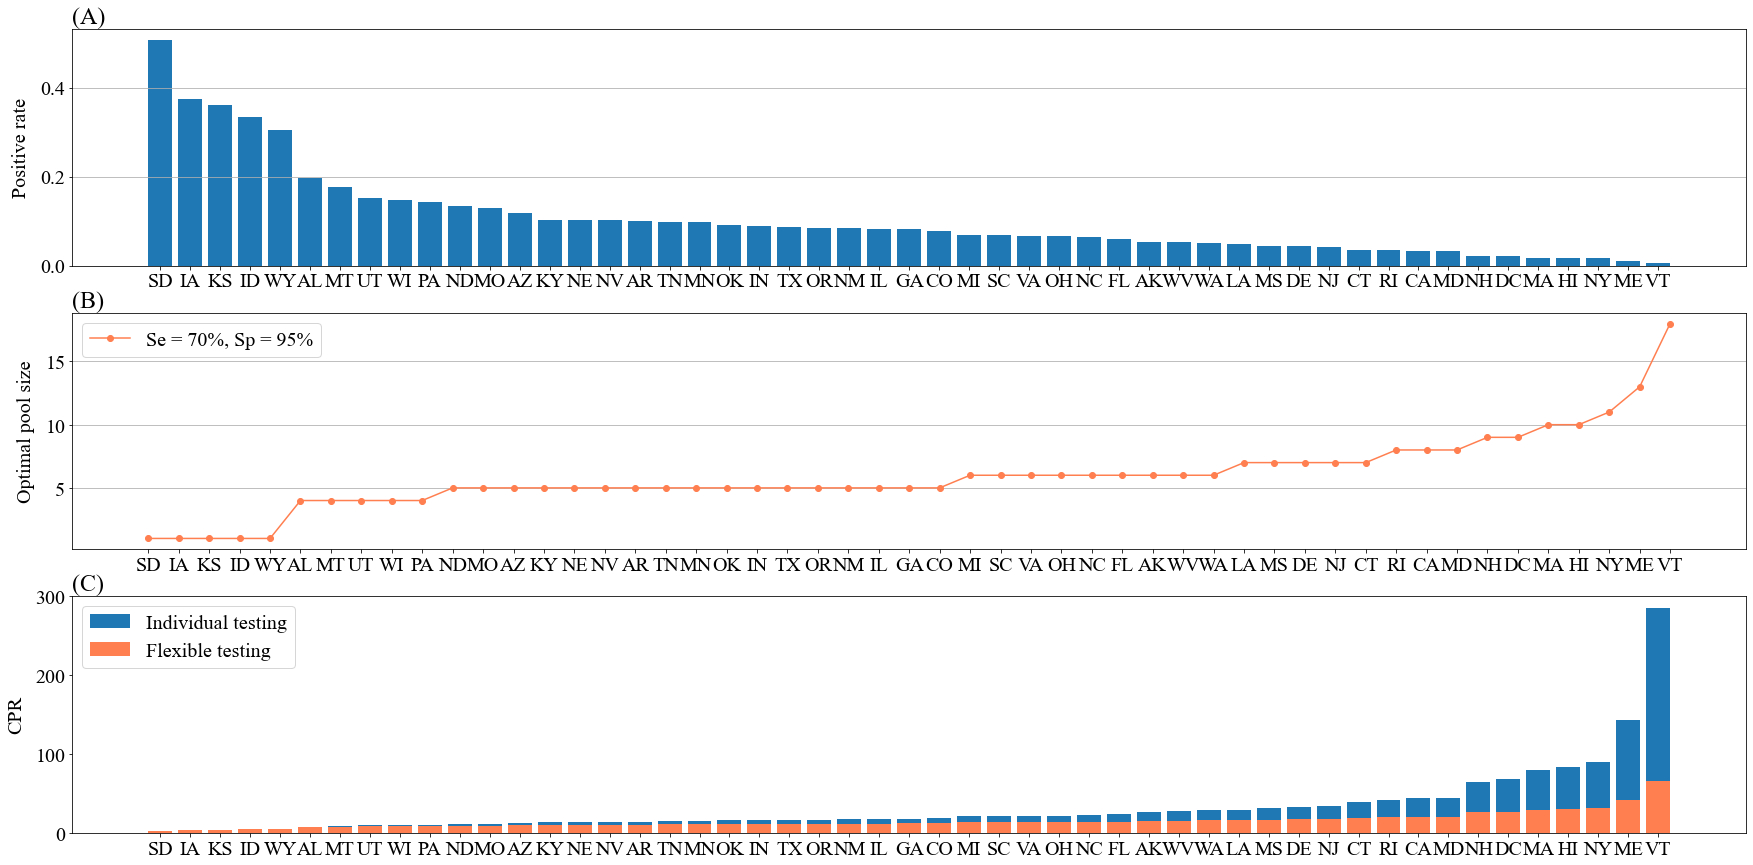

In [241]:
fig = plt.figure(figsize=(30,20))
ax_1 = fig.add_subplot(4,1,1)
ax_2 = fig.add_subplot(4,1,2)
ax_3 = fig.add_subplot(4,1,3)
# ax_4 = fig.add_subplot(4,1,4)
ax_1.grid(axis='y')
ax_1.set_title(label='(A)', loc='left')

ax_1.bar(data.State,data.pos_rate_T_days)
ax_1.set_ylabel('Positive rate')

# error_CPR_P = [data['CPR_Se_h']-data['CPR_Se_l'],data['CPR_Se_m']-data['CPR_Se_l']]
error_CPR_P = [data['N_Se_h']-data['N_Se_m'],data['N_Se_m']-data['N_Se_l']]


# ax_2.errorbar(data.State,data['CPR_Se_m'], yerr = error_CPR_P, fmt='o')

# error = [data['N_Se_h']-data['N_Se_m'],data['N_Se_m']-data['N_Se_l']]
# print(error)
# ax_3.errorbar(data.State,data['N_Se_m'], yerr = error, fmt='o')
# ax_2.plot(data.State,data['N_Se_m'],label= 'Se = 80%', marker =7 )

# ax_2.plot(data.State,data['N_Se_h'],label= 'Se = 90%', marker = 6)
ax_2.plot(data.State,data['N_Se_l'],label= 'Se = 70%, Sp = 95%', marker = "o",color = 'coral' )
ax_2.set_title(label='(B)', loc='left')

# ax_2.fill_between(data.State,  data['N_Se_h'],data['N_Se_l'], alpha=0.2)

ax_2.set_ylabel('Optimal pool size')
ax_2.grid(axis='y')
ax_2.legend()
# ax_2.text()

ax_3.set_title(label='(C)', loc='left')

ax_3.bar(data.State,data['CPR_I_l'],label= 'Individual testing')
# ax_3.plot(data.State,data['CPR_4'],label= 'Pooled testing (n = 4)',color = 'green')
ax_3.bar(data.State,data['CPR_Se_l'],label= 'Flexible testing',color = 'coral')
# ax_3.set_ylim(0,50)
ax_3.set_ylabel('CPR')
ax_3.legend()

# ax_3.bar(data.State,data['N_Se_h'])

# ax_3.bar(data.State,data['CPR_Se_l'])
# ax_3.bar(data.State,data['CPR_Se_h'])
# ax_3.bar(data.State,data['CPR_Se_m'])


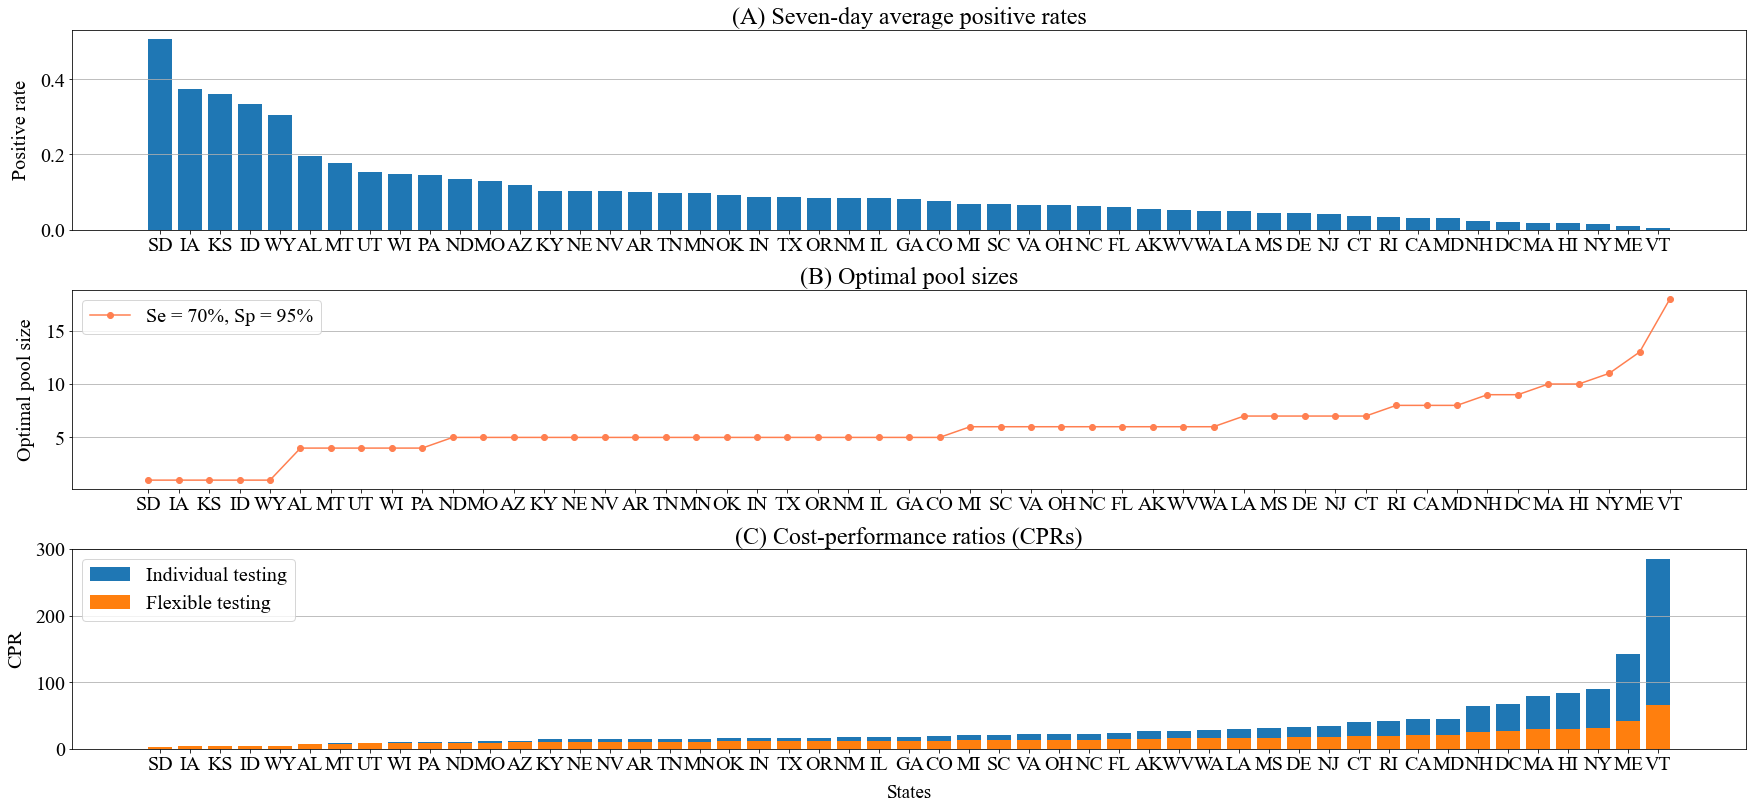

In [246]:
fig = plt.figure(figsize=(30,18))
ax_1 = fig.add_subplot(4,1,1)
ax_2 = fig.add_subplot(4,1,2)
ax_3 = fig.add_subplot(4,1,3)
# ax_4 = fig.add_subplot(4,1,4)
ax_1.grid(axis='y')
ax_1.set_title(label='(A) Seven-day average positive rates', loc='center')


ax_1.bar(data.State,data.pos_rate_T_days)
ax_1.set_ylabel('Positive rate')
# for a,b in zip(data.State,data.pos_rate_T_days):
#     ax_1.text(a, b+0.05, "%.1f%%" % (b * 100), ha='center', va= 'bottom')
# error_CPR_P = [data['CPR_Se_h']-data['CPR_Se_l'],data['CPR_Se_m']-data['CPR_Se_l']]
error_CPR_P = [data['N_Se_h']-data['N_Se_m'],data['N_Se_m']-data['N_Se_l']]


# ax_2.errorbar(data.State,data['CPR_Se_m'], yerr = error_CPR_P, fmt='o')

# error = [data['N_Se_h']-data['N_Se_m'],data['N_Se_m']-data['N_Se_l']]
# print(error)
# ax_3.errorbar(data.State,data['N_Se_m'], yerr = error, fmt='o')
# ax_2.plot(data.State,data['N_Se_h'],label= 'Se = 90%', marker = 6,markersize=8)
# ax_2.plot(data.State,data['N_Se_m'],label= 'Se = 80%', marker ="o", markersize=8)
ax_2.plot(data.State,data['N_Se_l'],label= 'Se = 70%, Sp = 95%', marker = "o",color = 'coral' )


ax_2.set_title(label='(B) Optimal pool sizes', loc='center')

# ax_2.fill_between(data.State,  data['N_Se_h'],data['N_Se_l'], alpha=0.2)

ax_2.set_ylabel('Optimal pool size')
ax_2.grid(axis='y')
ax_2.legend()
# ax_2.text()

ax_3.set_title(label='(C) Cost-performance ratios (CPRs)', loc='center')

ax_3.bar(data.State,data['CPR_I_l'],label= 'Individual testing')
ax_3.bar(data.State,data['CPR_Se_l'],label= 'Flexible testing')
ax_3.set_ylabel('CPR')
ax_3.set_xlabel('States',fontsize=19)
ax_3.grid(axis='y')

ax_3.legend()
plt.subplots_adjust( wspace=0, hspace =0.3)#调整子图间距

# ax_3.bar(data.State,data['N_Se_h'])

# ax_3.bar(data.State,data['CPR_Se_l'])
# ax_3.bar(data.State,data['CPR_Se_h'])
# ax_3.bar(data.State,data['CPR_Se_m'])
plt.savefig('1019_figure1.pdf',bbox_inches = 'tight')


In [251]:
CPR_I_l/CPR_Se_l

NameError: name 'CPR_I_l' is not defined

In [23]:
Se = 0.8
Sp = 0.95
p = np.linspace(0.14,0.145,10)
p_b = 1 -  np.exp((-1)*(Se+Sp-1)/(np.exp(1)))
print(p_b)
for i in p:
  N = Find_N_0(Se,Sp,i)
  N_int = Find_Int_N(Se,Sp,N,i)
  print (N_int[0],i)


0.24111845493826267
4.0 0.14
4.0 0.14055555555555557
4.0 0.14111111111111113
4.0 0.14166666666666666
4.0 0.14222222222222222
4.0 0.14277777777777778
4.0 0.14333333333333334
4.0 0.14388888888888887
4.0 0.14444444444444443
4.0 0.145


In [ ]:
se = 0.92
sp = 0.99
p = np.linspace(0.00017,0.0286,10)
for i in p:
  N = Find_N_0(se,sp,i)
  N_int,cpr_p,cpr_i = Find_Int_N(se,sp,N,i)

  eff = Eff(se,sp,N_int,i)
  print (i,eff,N_int)


0.00017 0.04618737784401172 32
0.003328888888888889 0.1184957750146749 19.0
0.006487777777777778 0.16068614454166275 14.0
0.009646666666666668 0.192946886522543 11.0
0.012805555555555556 0.2200397290234104 10.0
0.015964444444444444 0.24381426870660983 9.0
0.019123333333333336 0.2652477784573235 8.0
0.022282222222222224 0.28511217132327504 8.0
0.025441111111111112 0.30305939589975217 7.0
0.0286 0.32013206788501314 7.0


In [ ]:
p = np.linspace(0.001,0.3,300)
Sp = 0.95
Se = 0.7
n = []
cpr = []

for j in p:
    N = Find_N_0(Se,Sp,j)
    N_int,cpr_p,cpr_i = Find_Int_N(Se,Sp,N,j)
    n.append(N_int)
    cpr.append(cpr_p)
    
plt.plot(p,cpr)
# print(p,n)

        
        



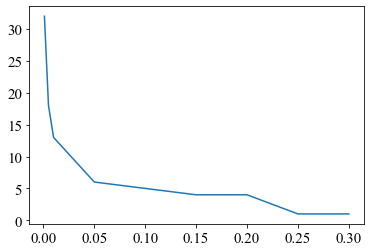

In [10]:
p = [0.001,0.005, 0.01,0.05,0.1,0.15,0.2,0.25,0.3]
Sp = 0.95
Se = 0.7
n = []
cpr_pt = []
cpr_it = []

for j in p:
    N = Find_N_0(Se,Sp,j)
    N_int,cpr_p,cpr_i = Find_Int_N(Se,Sp,N,j)
    n.append(N_int)
    cpr_pt.append(cpr_p)
    cpr_it.append(cpr_i)
    
    
    
# plt.plot(p,cpr_pt)
# plt.plot(p,cpr_it)
plt.plot(p,n)


In [6]:
p = np.arange(0.01, 0.25, 0.001)
Sp = 0.95
Se = np.arange(0.7, 1, 0.001)
n = []
cpr_pt = []
cpr_it = []
x = []
y = []
for i in Se:
    for j in p:
        x.append(j)
        y.append(i)

        N = Find_N_0(i,Sp,j)
        N_int,cpr_p,cpr_i = Find_Int_N(i,Sp,N,j)
        n.append(N_int)
        cpr_pt.append(cpr_p)
        cpr_it.append(cpr_i)
    
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
ax.scatter(x, y, n)  # 绘制数据点
# ax.plot_surface(x, y, n,rstride = 1, cstride = 1,cmap='rainbow')
# plt.show()

ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

NameError: name 'np' is not defined

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
rcParams['axes.labelpad'] = 9
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(25,13))
gs = GridSpec(2,3, figure=fig)
ax1 = fig.add_subplot(gs[0:,0], projection='3d')
ax2 = fig.add_subplot(gs[0,-2], projection='3d')
ax3 = fig.add_subplot(gs[0,-1], projection='3d')
ax4 = fig.add_subplot(gs[-1,-2], projection='3d')
ax5 = fig.add_subplot(gs[-1,-1], projection='3d')

sp = np.arange(0.7, 1, 0.01)
se = np.arange(0.7, 1, 0.01)
sp, se = np.meshgrid(sp, se)
p_lb = 1 -  np.exp((-1)*(se+sp-1)/(np.exp(1)))
ax1.plot_surface(sp, se, p_lb, rstride=1, cstride=1, cmap='rainbow')



p = np.arange(0.0015, 0.3, 0.01)
se = np.arange(0.7, 1, 0.01)
sp = 0.9
p, se = np.meshgrid(X, Y)
xx = (-1/2)*np.sqrt(np.log(1/(1-p))/(se+sp-1)) 
n_0 =np.real(2/(np.log(1-p))*lambertw(xx))  
cpr_n_0 =((1/n_0 +(se-(se+sp-1)*(1-p)**n_0))/(se**2*p)) 
cpr_n_i = 1/(se*p)


for i in range(len(n_0)):
    for j in range(len(n_0[0])):
        n_0[i][j],cpr_n_0[i][j],cpr_n_i[i][j] = Find_Int_N(se[i][j],sp, n_0[i][j],p[i][j])


ax2.plot_surface(p, se, n_0, rstride=1, cstride=1, cmap='rainbow')
ax3.plot_surface(p, se, cpr_n_0, rstride=1, cstride=1, cmap='rainbow')

ax1.set_xlabel('Specificcity')
ax1.set_xlim(0.7, 1)  #拉开坐标轴范围显示投影
ax1.set_ylabel('Sensitivity')
ax1.set_ylim(0.7, 1)
ax1.set_zlabel('Prevalence threshold')
ax1.set_title('A')
a = np.linspace(0.7, 1, 4)
b = np.linspace(0.1, 0.3,3)
ax1.set_xticks(a)
ax1.set_yticks(a)
ax1.set_zticks(b)

#设定显示范围
ax2.set_xlabel('Prevalence',linespacing=3.2)
ax2.set_xlim(0, 0.3)  #拉开坐标轴范围显示投影
ax2.set_ylabel('Sensitivity')
ax2.set_ylim(0.7, 0.99)
ax2.set_zlabel('Optimal pool size')
ax2.set_zlim(0, 33)
ax2.set_title('B')
c = np.linspace(0, 0.3,4)
ax2.set_xticks(c)
ax2.set_yticks(a)

ax3.set_xlabel('Prevalence')
ax3.set_xlim(0, 0.3)  #拉开坐标轴范围显示投影
ax3.set_ylabel('Sensitivity')
ax3.set_ylim(0.7, 0.99)
ax3.set_zlabel('CPR',rotation=90)
# ax.set_xticklabels(labels,rotation=120) 
ax3.set_title('C')
ax3.set_xticks(c)
ax3.set_yticks(a)



X = np.arange(0.0015, 0.35,0.01)
Y = np.arange(0.7, 1, 0.01)
se = 0.9
X, Y = np.meshgrid(X, Y)
xx = (-1/2)*np.sqrt(np.log(1/(1-X))/(se+Y-1)) 
n_0 =np.round(np.real(2/(np.log(1-X))*lambertw(xx)))   
cpr_n_0 =((1/n_0 +(se-(se+Y-1)*(1-X)**n_0))/(se**2*X)) 
cpr_n_i = 1/(se*X)

for i in range(len(n_0)):
    for j in range(len(n_0[0])):
        n_0[i][j],cpr_n_0[i][j],cpr_n_i[i][j] = Find_Int_N(se,Y[i][j], n_0[i][j],X[i][j])

ax4.plot_surface(X, Y, n_0, rstride=1, cstride=1, cmap='rainbow')
ax5.plot_surface(X, Y, cpr_n_0, rstride=1, cstride=1, cmap='rainbow')



#设定显示范围
ax4.set_xlabel('Prevalence',linespacing=3.2)
ax4.set_xlim(0, 0.3)  #拉开坐标轴范围显示投影
ax4.set_ylabel('Specificcity')
ax4.set_ylim(0.7, 0.99)
ax4.set_zlabel('Optimal pool size')
ax4.set_zlim(0, 33)
ax4.set_title('D')
c = np.linspace(0, 0.3,4)
ax4.set_xticks(c)
ax4.set_yticks(a)

ax5.set_xlabel('Prevalence')
ax5.set_xlim(0, 0.3)  #拉开坐标轴范围显示投影
ax5.set_ylabel('Specificcity')
ax5.set_ylim(0.7, 0.99)
ax5.set_zlabel('CPR',rotation=90)
ax5.set_title('E')
ax5.set_xticks(c)
ax5.set_yticks(a)





plt.subplots_adjust(hspace=0.05, wspace=0.03)#调整子图间距


plt.show()

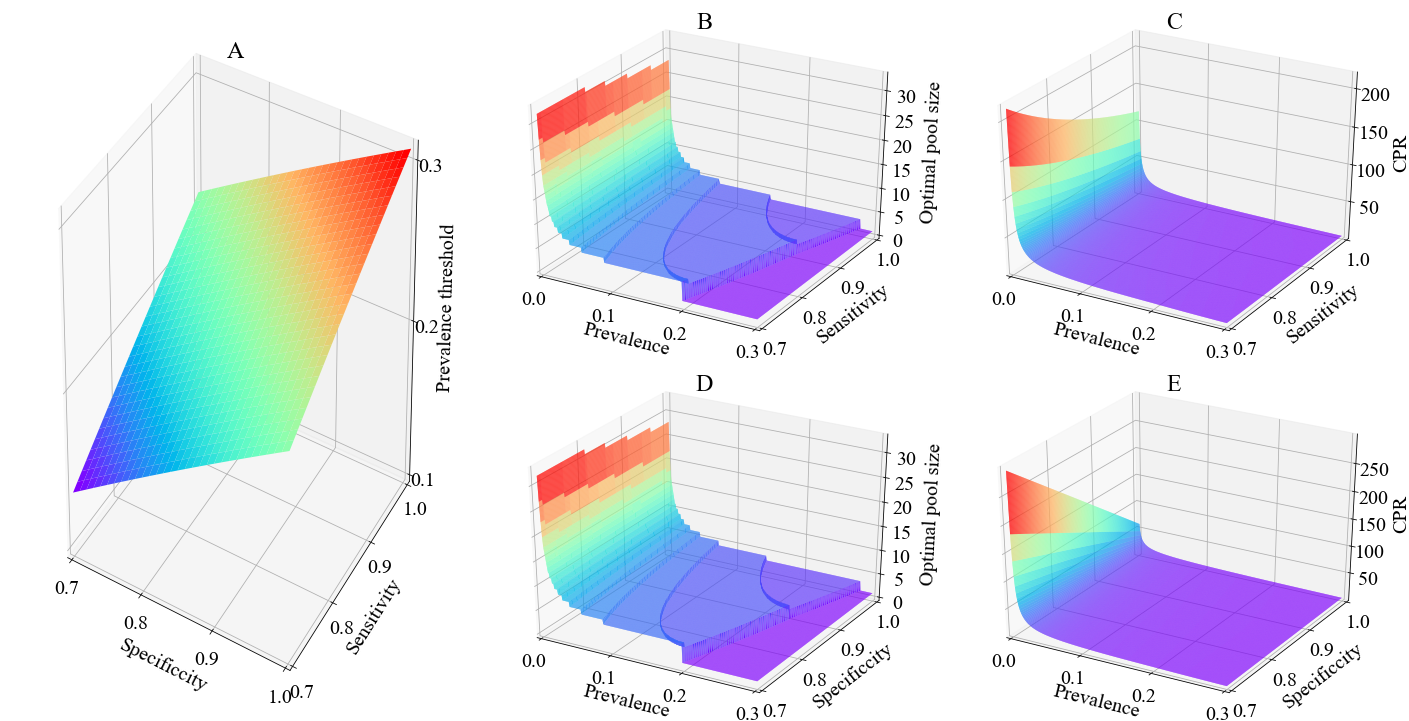

In [27]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
rcParams['axes.labelpad'] = 9
from matplotlib.gridspec import GridSpec


fig = plt.figure(figsize=(25,13))
gs = GridSpec(2,3, figure=fig)
ax1 = fig.add_subplot(gs[0:,0], projection='3d')
ax2 = fig.add_subplot(gs[0,-2], projection='3d')
ax3 = fig.add_subplot(gs[0,-1], projection='3d')
ax4 = fig.add_subplot(gs[-1,-2], projection='3d')
ax5 = fig.add_subplot(gs[-1,-1], projection='3d')

sp = np.arange(0.7, 1, 0.01)
se = np.arange(0.7, 1, 0.01)
sp, se = np.meshgrid(sp, se)
p_lb = 1 -  np.exp((-1)*(se+sp-1)/(np.exp(1)))
ax1.plot_surface(sp, se, p_lb, rstride=1, cstride=1, cmap='rainbow')



p = np.arange(0.0015, 0.3, 0.001)
se = np.arange(0.7, 1, 0.001)
sp = 0.9
p, se = np.meshgrid(p, se)
xx = (-1/2)*np.sqrt(np.log(1/(1-p))/(se+sp-1)) 
n_0 =np.real(2/(np.log(1-p))*lambertw(xx))  
cpr_n_0 =((1/n_0 +(se-(se+sp-1)*(1-p)**n_0))/(se**2*p)) 
cpr_n_i = 1/(se*p)


for i in range(len(n_0)):
    for j in range(len(n_0[0])):
        n_0[i][j],cpr_n_0[i][j],cpr_n_i[i][j] = Find_Int_N(se[i][j],sp, n_0[i][j],p[i][j])


ax2.plot_surface(p, se, n_0, rstride=1, cstride=1, cmap='rainbow')
ax3.plot_surface(p, se, cpr_n_0, rstride=1, cstride=1, cmap='rainbow')

ax1.set_xlabel('Specificcity')
ax1.set_xlim(0.7, 1)  #拉开坐标轴范围显示投影
ax1.set_ylabel('Sensitivity')
ax1.set_ylim(0.7, 1)
ax1.set_zlabel('Prevalence threshold')
ax1.set_title('A')
a = np.linspace(0.7, 1, 4)
b = np.linspace(0.1, 0.3,3)
ax1.set_xticks(a)
ax1.set_yticks(a)
ax1.set_zticks(b)



p = np.arange(0.0015, 0.3,0.001)
sp = np.arange(0.7, 1, 0.001)
se = 0.9
p, sp = np.meshgrid(p, sp)
xx = (-1/2)*np.sqrt(np.log(1/(1-p))/(se+sp-1)) 
n_0 =np.round(np.real(2/(np.log(1-p))*lambertw(xx)))   
cpr_n_0 =((1/n_0 +(se-(se+sp-1)*(1-p)**n_0))/(se**2*p)) 
cpr_n_i = 1/(se*p)

for i in range(len(n_0)):
    for j in range(len(n_0[0])):
        n_0[i][j],cpr_n_0[i][j],cpr_n_i[i][j] = Find_Int_N(se,sp[i][j], n_0[i][j],p[i][j])

ax4.plot_surface(p,sp, n_0, rstride=1, cstride=1, cmap='rainbow')
ax5.plot_surface(p,sp, cpr_n_0, rstride=1, cstride=1, cmap='rainbow')


ax2.set_xlabel('Prevalence',linespacing=3.2)
ax2.set_xlim(0, 0.3)  
ax2.set_ylabel('Sensitivity')
ax2.set_ylim(0.7, 0.99)
ax2.set_zlabel('Optimal pool size')
ax2.set_zlim(0, 33)
ax2.set_title('B')
c = np.linspace(0, 0.3,4)
ax2.set_xticks(c)
ax2.set_yticks(a)

ax3.set_xlabel('Prevalence')
ax3.set_xlim(0, 0.3)  
ax3.set_ylabel('Sensitivity')
ax3.set_ylim(0.7, 0.99)
ax3.set_zlabel('CPR',rotation=90)
ax3.set_title('C')
ax3.set_xticks(c)
ax3.set_yticks(a)


ax4.set_xlabel('Prevalence',linespacing=3.2)
ax4.set_xlim(0, 0.3)  
ax4.set_ylabel('Specificcity')
ax4.set_ylim(0.7, 0.99)
ax4.set_zlabel('Optimal pool size')
ax4.set_zlim(0, 33)
ax4.set_title('D')
c = np.linspace(0, 0.3,4)
ax4.set_xticks(c)
ax4.set_yticks(a)

ax5.set_xlabel('Prevalence')
ax5.set_xlim(0, 0.3)  
ax5.set_ylabel('Specificcity')
ax5.set_ylim(0.7, 0.99)
ax5.set_zlabel('CPR',rotation=90)
ax5.set_title('E')
ax5.set_xticks(c)
ax5.set_yticks(a)


plt.subplots_adjust(hspace=0.05, wspace=0.03)


plt.show()

In [184]:
X = np.arange(0.1, 0.3, 0.1)
Y = np.arange(0.7, 1, 0.1)
sp = 0.9
X, Y = np.meshgrid(X, Y)
xx = (-1/2)*np.sqrt(np.log(1/(1-X))/(Y+sp-1)) 
n_0 =np.real(2/(np.log(1-X))*lambertw(xx))  
cpr_n_0 =((1/n_0 +(Y-(Y+sp-1)*(1-X)**n_0))/(Y**2*X)) 
cpr_n_i = 1/(Y*X)


for i in range(len(n_0)):
    for j in range(len(n_0[0])):
        n_0[i][j],cpr_n_0[i][j],cpr_n_i[i][j] = Find_Int_N(Y[i][j],sp, n_0[i][j],X[i][j])


[[5.24231346 4.53074211]
 [4.72228207 3.91705605]
 [4.3260387  3.49586955]
 [4.01162991 3.18279796]] [[11.13045328  7.16737463]
 [ 9.15852674  5.96263769]
 [ 7.7037365   5.05775719]
 [ 6.59508342  4.35903447]] [[14.28571429  7.14285714]
 [12.5         6.25      ]
 [11.11111111  5.55555556]
 [10.          5.        ]]
5.0
11.13685714285714
14.285714285714286
1.0
7.142857142857143
7.142857142857143
5.0
9.166515625000002
12.5
4.0
5.963124999999999
6.25
4.0
7.717530864197532
11.11111111111111
4.0
5.076049382716049
5.555555555555555
4.0
6.595100000000002
10.0
3.0
4.362666666666667
5.0


In [175]:
n_0

array([[5.24231346, 4.53074211],
       [4.72228207, 3.91705605],
       [4.3260387 , 3.49586955],
       [4.01162991, 3.18279796]])

In [166]:
p_lb = 1 -  np.exp((-1)*(0.9+0.7-1)/(np.exp(1)))
p_lb

0.1980649542264954

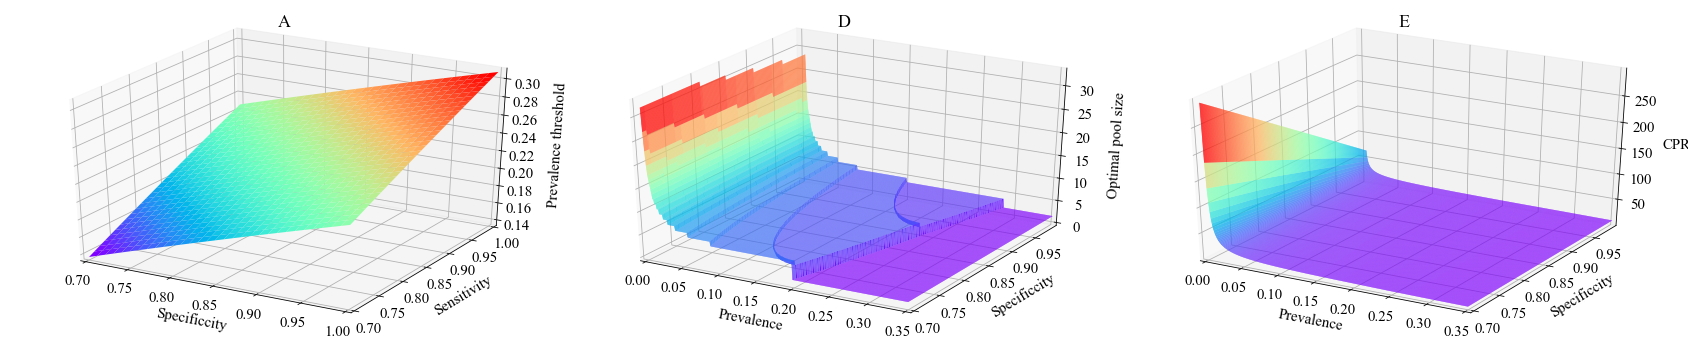

In [199]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
rcParams['axes.labelpad'] = 10

fig = plt.figure(figsize=(30,6))
ax1 = fig.add_subplot(1,3,1, projection='3d')
ax2 = fig.add_subplot(1,3,2, projection='3d')
ax3 = fig.add_subplot(1,3,3, projection='3d')

X = np.arange(0.7, 1, 0.01)
Y = np.arange(0.7, 1, 0.01)
X, Y = np.meshgrid(X, Y)
p_lb = 1 -  np.exp((-1)*(X+Y-1)/(np.exp(1)))
ax1.plot_surface(X, Y, p_lb, rstride=1, cstride=1, cmap='rainbow')


X = np.arange(0.0015, 0.35,0.001)
Y = np.arange(0.7, 1, 0.001)
se = 0.9
X, Y = np.meshgrid(X, Y)
xx = (-1/2)*np.sqrt(np.log(1/(1-X))/(se+Y-1)) 
n_0 =np.round(np.real(2/(np.log(1-X))*lambertw(xx)))   
cpr_n_0 =((1/n_0 +(se-(se+Y-1)*(1-X)**n_0))/(se**2*X)) 
cpr_n_i = 1/(se*X)

for i in range(len(n_0)):
    for j in range(len(n_0[0])):
        n_0[i][j],cpr_n_0[i][j],cpr_n_i[i][j] = Find_Int_N(se,Y[i][j], n_0[i][j],X[i][j])

# 具体函数方法可用 help(function) 查看，如：help(ax.plot_surface)
ax2.plot_surface(X, Y, n_0, rstride=1, cstride=1, cmap='rainbow')
ax3.plot_surface(X, Y, cpr_n_0, rstride=1, cstride=1, cmap='rainbow')
# ax2.plot_surface(X, Y, cpr_n_i, rstride=1, cstride=1, cmap='rainbow')



#设定显示范围
ax1.set_xlabel('Specificcity')
ax1.set_xlim(0.7, 1)  #拉开坐标轴范围显示投影
ax1.set_ylabel('Sensitivity')
ax1.set_ylim(0.7, 1)
ax1.set_zlabel('Prevalence threshold')
ax1.set_title('A')

#设定显示范围
ax2.set_xlabel('Prevalence',linespacing=3.2)
ax2.set_xlim(0, 0.35)  #拉开坐标轴范围显示投影
ax2.set_ylabel('Specificcity')
ax2.set_ylim(0.7, 0.99)
ax2.set_zlabel('Optimal pool size')
ax2.set_zlim(0, 33)
ax2.set_title('D')


ax3.set_xlabel('Prevalence')
ax3.set_xlim(0, 0.35)  #拉开坐标轴范围显示投影
ax3.set_ylabel('Specificcity')
ax3.set_ylim(0.7, 0.99)
ax3.set_zlabel('CPR')
ax3.set_title('E')



plt.subplots_adjust(hspace=0.01, wspace=0.01)#调整子图间距


plt.show()

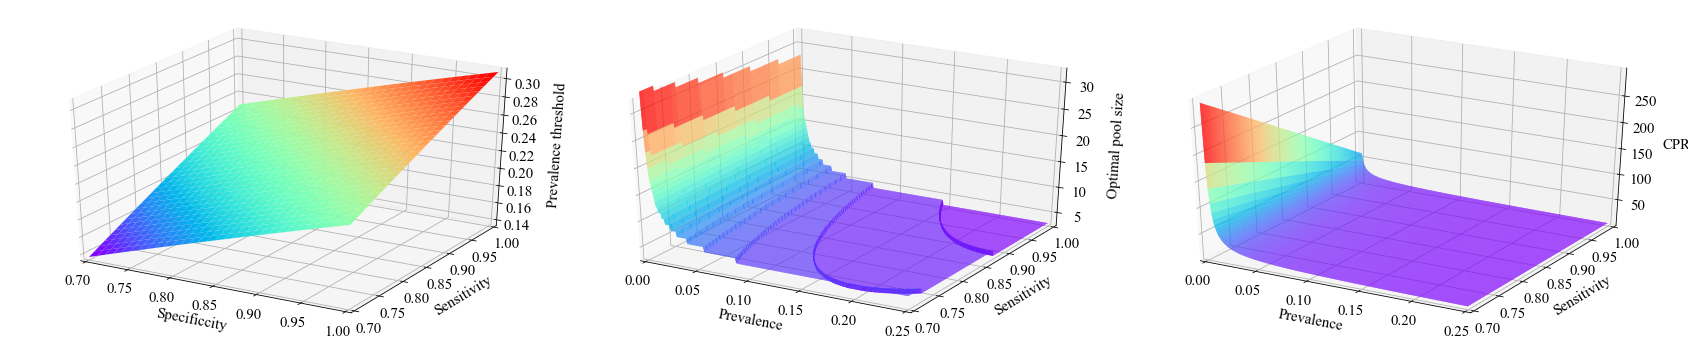

In [151]:
from matplotlib import pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
rcParams['axes.labelpad'] = 10

fig = plt.figure(figsize=(30,6))
ax1 = fig.add_subplot(1,3,1, projection='3d')
ax2 = fig.add_subplot(1,3,2, projection='3d')
ax3 = fig.add_subplot(1,3,3, projection='3d')

X = np.arange(0.7, 1, 0.01)
Y = np.arange(0.7, 1, 0.01)
X, Y = np.meshgrid(X, Y)
p_lb = 1 -  np.exp((-1)*(X+Y-1)/(np.exp(1)))
ax1.plot_surface(X, Y, p_lb, rstride=1, cstride=1, cmap='rainbow')


# fig = plt.figure()
# ax = Axes3D(fig)
X = np.arange(0.0015, 0.25, 0.001)
Y = np.arange(0.7, 1, 0.001)
se = 0.9
X, Y = np.meshgrid(X, Y)
xx = (-1/2)*np.sqrt(np.log(1/(1-X))/(Y+se-1)) 
n_0 =np.round(np.real(2/(np.log(1-X))*lambertw(xx)))   

cpr_n_0 =((1/n_0 +(se-(se+Y-1)*(1-X)**n_0))/(se**2*X)) 

cpr_n_i = 1/(se*X)

# 具体函数方法可用 help(function) 查看，如：help(ax.plot_surface)
ax2.plot_surface(X, Y, n_0, rstride=1, cstride=1, cmap='rainbow')
ax3.plot_surface(X, Y, cpr_n_0, rstride=1, cstride=1, cmap='rainbow')
# ax2.plot_surface(X, Y, cpr_n_i, rstride=1, cstride=1, cmap='rainbow')

#设定显示范围
ax1.set_xlabel('Specificcity')
ax1.set_xlim(0.7, 1)  #拉开坐标轴范围显示投影
ax1.set_ylabel('Sensitivity')
ax1.set_ylim(0.7, 1)
ax1.set_zlabel('Prevalence threshold')


#设定显示范围
ax2.set_xlabel('Prevalence',linespacing=3.2)
ax2.set_xlim(0, 0.25)  #拉开坐标轴范围显示投影
ax2.set_ylabel('Specificcity')
ax2.set_ylim(0.7, 1)
ax2.set_zlabel('Optimal pool size')
ax2.set_zlim(3, 32)


ax3.set_xlabel('Prevalence')
ax3.set_xlim(0, 0.25)  #拉开坐标轴范围显示投影
ax3.set_ylabel('Specificcity')
ax3.set_ylim(0.7, 1)
ax3.set_zlabel('CPR')

plt.subplots_adjust(hspace=0.01, wspace=0.01)#调整子图间距


plt.show()

In [119]:
p_lb

array([[0.13683704, 0.14000661, 0.14316453, 0.14631086, 0.14944564,
        0.15256891, 0.1556807 , 0.15878107, 0.16187006, 0.1649477 ,
        0.16801405, 0.17106913, 0.17411299, 0.17714568, 0.18016723,
        0.18317769, 0.18617709, 0.18916547, 0.19214289, 0.19510937,
        0.19806495, 0.20100969, 0.20394361, 0.20686676, 0.20977917,
        0.21268089, 0.21557195, 0.2184524 , 0.22132227, 0.22418161,
        0.22703044],
       [0.14000661, 0.14316453, 0.14631086, 0.14944564, 0.15256891,
        0.1556807 , 0.15878107, 0.16187006, 0.1649477 , 0.16801405,
        0.17106913, 0.17411299, 0.17714568, 0.18016723, 0.18317769,
        0.18617709, 0.18916547, 0.19214289, 0.19510937, 0.19806495,
        0.20100969, 0.20394361, 0.20686676, 0.20977917, 0.21268089,
        0.21557195, 0.2184524 , 0.22132227, 0.22418161, 0.22703044,
        0.22986881],
       [0.14316453, 0.14631086, 0.14944564, 0.15256891, 0.1556807 ,
        0.15878107, 0.16187006, 0.1649477 , 0.16801405, 0.17106913,
      

In [31]:
ax = Axes3D(fig)
ax.plot_surface(X, Y, cpr_n_0, rstride=1, cstride=1, cmap='rainbow')
plt.show()

In [24]:
n_0

array([[        nan, 39.0958563 , 27.86948218, ...,  4.57105252,
         4.6011392 ,  4.63372363],
       [        nan, 39.06656864, 27.84842549, ...,  4.55395684,
         4.58315364,  4.61470314],
       [        nan, 39.03734628, 27.82741604, ...,  4.53720432,
         4.56555921,  4.59613476],
       ...,
       [        nan, 32.66253059, 23.25079452, ...,  2.80829419,
         2.8082001 ,  2.80815057],
       [        nan, 32.64539263, 23.23850831, ...,  2.80542719,
         2.80532192,  2.80526103],
       [        nan, 32.62828148, 23.2262414 , ...,  2.80256892,
         2.80245256,  2.80238038]])

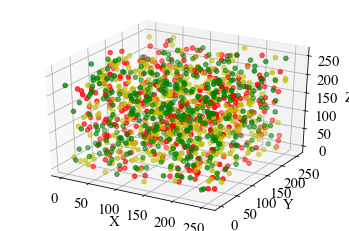

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = np.random.randint(0, 255, size=[40, 40, 40])

x, y, z = data[0], data[1], data[2]
ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
ax.scatter(x[:10], y[:10], z[:10], c='y')  # 绘制数据点
ax.scatter(x[10:20], y[10:20], z[10:20], c='r')
ax.scatter(x[30:40], y[30:40], z[30:40], c='g')

ax.set_zlabel('Z')  # 坐标轴
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

# Calculation and Plot Figure 1


In [145]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio

fig = make_subplots(
        rows=2, cols=3, 
        specs=[[{'type': 'choropleth'},{'type': 'choropleth'},
        {'type': 'choropleth'}], [{'type': 'choropleth'},
        {'type': 'choropleth'},{'type': 'choropleth'}]],  

        subplot_titles=(r'$\text{(A1) Seven-day average positive rate}$' 
                        , r'$\text{(B1) Optimal pool size}\,(n_1^*)$'    
                        , r'$\text{(C1) Optimal pool size}\,(n_2^*)$'
                        , r'$\text{(A2) CPR}\, (n = 1|S_e=0.7,S_p=0.95)$' 
                        , r'$\text{(B2) CPR}\, (n_1^*|S_e=0.7,S_p=0.95)$' 
                        , r'$\text{(C2) CPR}\, (n_2^*|S_e=0.95,S_p=0.95)$')
        )


trace1_1 = go.Choropleth( 
    locations=data['State'],  
    z = data['pos_rate_T_days'].astype(float), 
    locationmode = 'USA-states', 
    colorbar = dict(thickness = 5, outlinewidth = 0.5, len = 0.4, x = 0.3, xanchor = 'left', y = 1,  yanchor = 'top', borderwidth = 0),
    # colorscale = 'brwnyl', 
    colorscale = 'burg', 


    zmax = 1,
    zmin = 0    
    ) 

trace1_2 = go.Choropleth( 
    locations=data['State'],  
    z = data['N_Se_m'].astype(float), 
    locationmode = 'USA-states', 
    colorbar = dict(thickness = 5, outlinewidth = 0.5, len = 0.4, x = 0.65, xanchor = 'left', y = 1,  yanchor = 'top', borderwidth = 0),
    colorscale = 'Reds',
    zmax = 32,
    zmin = 1
    ) 

trace1_3 = go.Choropleth( 
    locations=data['State'],  
    z = data['N_Se_h'].astype(float), 
    locationmode = 'USA-states',
    colorbar = dict(thickness = 5, outlinewidth = 0.5, len = 0.4, x = 1, xanchor = 'left', y = 1,  yanchor = 'top', borderwidth = 0),
    colorscale = 'Reds',
    zmax = 32,
    zmin = 1 
    ) 

trace2_1 = go.Choropleth( 
    locations=data['State'], 
    z = data['CPR_I_m'].astype(float),
    locationmode = 'USA-states',
    colorbar = dict(thickness = 5, outlinewidth = 0.5, len = 0.4, x = 0.3, xanchor = 'left', y = 0.4,  yanchor = 'top', borderwidth = 0),
    colorscale = 'dense', 
    zmax = 260,
    zmin = 0
    ) 

trace2_2 = go.Choropleth( 
    locations=data['State'], 
    z = data['CPR_Se_m'].astype(float),
    locationmode = 'USA-states',
    colorbar = dict(thickness = 5, outlinewidth = 0.5, len = 0.4, x = 0.65, xanchor = 'left', y = 0.4,  yanchor = 'top', borderwidth = 0),
    colorscale = 'blues',
    zmax = 75,
    zmin = 0 
    ) 

trace2_3 = go.Choropleth( 
    locations=data['State'],
    z = data['CPR_Se_h'].astype(float),
    locationmode = 'USA-states', 
    colorbar = dict(thickness = 5, outlinewidth = 0.5, len = 0.4, x = 1, xanchor = 'left', y = 0.4,  yanchor = 'top', borderwidth = 0, ypad = 10),
    colorscale = 'blues', 
    zmax = 75,
    zmin = 0
    )

fig.add_trace(trace1_1, row=1, col=1)
fig.add_trace(trace1_2, row=1, col=2)
fig.add_trace(trace1_3, row=1, col=3)
fig.add_trace(trace2_1, row=2, col=1)
fig.add_trace(trace2_2, row=2, col=2) 
fig.add_trace(trace2_3, row=2, col=3)

fig.update_geos(scope="usa")
fig.update_layout(height=500, width=1000, overwrite = True, geo_scope='usa')

ModuleNotFoundError: No module named '_plotly_utils'

In [ ]:
     - One of the following named colorscales:
            ['aggrnyl', 'agsunset', 'algae', 'amp', 'armyrose', 'balance',
             'blackbody', 'bluered', 'blues', 'blugrn', 'bluyl', 'brbg',
             'brwnyl', 'bugn', 'bupu', 'burg', 'burgyl', 'cividis', 'curl',
             'darkmint', 'deep', 'delta', 'dense', 'earth', 'edge', 'electric',
             'emrld', 'fall', 'geyser', 'gnbu', 'gray', 'greens', 'greys',
             'haline', 'hot', 'hsv', 'ice', 'icefire', 'inferno', 'jet',
             'magenta', 'magma', 'matter', 'mint', 'mrybm', 'mygbm', 'oranges',
             'orrd', 'oryel', 'peach', 'phase', 'picnic', 'pinkyl', 'piyg',
             'plasma', 'plotly3', 'portland', 'prgn', 'pubu', 'pubugn', 'puor',
             'purd', 'purp', 'purples', 'purpor', 'rainbow', 'rdbu', 'rdgy',
             'rdpu', 'rdylbu', 'rdylgn', 'redor', 'reds', 'solar', 'spectral',
             'speed', 'sunset', 'sunsetdark', 'teal', 'tealgrn', 'tealrose',
             'tempo', 'temps', 'thermal', 'tropic', 'turbid', 'twilight',
             'viridis', 'ylgn', 'ylgnbu', 'ylorbr', 'ylorrd'].
        Appending '_r' to a named colorscale reverses it.

# Define simulation function

In [ ]:
# The SIR model differential equations 
def deriv_individual_testing(y, t, N, R_0, gamma_0, C_0, se, sp, x):
    S, I, Q, R1, R2, TCT,TFP = y
    RT = R1 + R2 + Q 
    Ct = C_0   
    beta = x*R_0*gamma_0
    Re = 0
    
#   Update prevalence rate 
    Pt = I/(S+I+R1)  
#   Group size is one for individual testing
    n = 1

#   Calculate testing throughput (different from baseline testing capacity).  
    eff = Eff(se,sp,n,Pt)
#   Calculate testing throughput (different from baseline testing capacity).
    Ct = C_0/eff
#   Calculate CPR
    cpr_i = 1/(se*Pt)
    cpr_n = cpr_i

#   Caculate real-time positive predictive value, negative predictive value,
#   expected number of false positives, expected number of true positive, and
#   the number of false positives during time interval dt.
    PPV, NPV, ETP, EFP = PV(se, sp, n, Pt)
    FP = Ct*EFP    
    
#   update Re, gamma_1 is the effects of testing
    gamma_1 = Ct*(se)/(S+I+R1)
    gamma = gamma_0+ gamma_1
    Re = beta * S/gamma   

#    Epidemic dynamics    
    dSdt = -beta * S * I
    dIdt = beta * S * I  - gamma_0 * I - Ct*(se)*Pt
    dQdt =  Ct*(se)*Pt - gamma_0 * Q 
    dR1dt = gamma_0 * I   
    dR2dt = gamma_0 * Q
    dTCT = Ct
    dTFP = FP
        
    SIM_result_i.append([ R_0, C_0, se, t,S, I, Q, R1, R2,RT,TCT,gamma_1,n,cpr_n,cpr_i,Re,Pt,Ct,TFP,PPV,NPV])
    return dSdt, dIdt,dQdt,dR1dt, dR2dt,dTCT,dTFP



In [ ]:
# The SIR model differential equations 
def deriv(y, T_type, t, N, R_0, gamma_0, C_0, se, sp, x):
    S, I, Q, R1, R2, TCT,TFP = y
    RT = R1 + R2 + Q 
    Ct = C_0   
    beta = x*R_0*gamma_0
    Re = 0
    
#   Update prevalence rate 
    Pt = I/(S+I+R1) 
    if T_type ==2:
#   Group size is one for individual testing
      n = 1
      cpr_i = 1/(se*Pt)
      cpr_n = cpr_i
    else:
      n_0 = Find_N_0(se,sp,Pt)
      n,cpr_n,cpr_i = Find_Int_N(se,sp,n_0,Pt)

#   Calculate testing throughput (different from baseline testing capacity).  
    eff = Eff(se,sp,n,Pt)
#   Calculate testing throughput (different from baseline testing capacity).
    Ct = C_0/eff


#   Caculate real-time positive predictive value, negative predictive value,
#   expected number of false positives, expected number of true positive, and
#   the number of false positives during time interval dt.
    PPV, NPV, ETP, EFP = PV(se, sp, n, Pt)
    FP = Ct*EFP    
    
#   update Re, gamma_1 is the effects of testing
    gamma_1 = Ct*(se)/(S+I+R1)
    gamma = gamma_0+ gamma_1
    Re = beta * S/gamma   

#    Epidemic dynamics    
    dSdt = -beta * S * I
    dIdt = beta * S * I  - gamma_0 * I - Ct*(se)*Pt
    dQdt =  Ct*(se)*Pt - gamma_0 * Q 
    dR1dt = gamma_0 * I   
    dR2dt = gamma_0 * Q
    dTCT = Ct
    dTFP = FP
        
    # SIM_result_i.append([ R_0, C_0, se, t,S, I, Q, R1, R2,RT,TCT,gamma_1,n,cpr_n,cpr_i,Re,Pt,Ct,TFP,PPV,NPV])
    return dSdt, dIdt,dQdt,dR1dt, dR2dt,dTCT,dTFP



In [ ]:
# The SIR model differential equations.
def deriv_0(y, t, N, R_0, gamma_0, C_0, se, sp,x):
    S, I, Q, R1, R2, TCT,TFP = y
    RT = R1 + R2 + Q 
    beta =x* R_0*gamma_0


# prevalence rate change along time
    Pt = I/(S+I+R1) 
    n = 0
    cpr_n = 0
    cpr_i = 0
    Ct = 0   
    

# remove rate update    
    gamma_1 =0
    gamma = gamma_0+ gamma_1
    Re = beta * S/gamma           
    
    dSdt = -beta * S * I
    dIdt = beta * S * I  - gamma_0 * I - Ct*(se)*Pt
    dQdt =  Ct*(se)*Pt - gamma_0 * Q 
    dR1dt = gamma_0 * I   
    dR2dt = gamma_0 * Q
    dTCT = Ct
    dTFP = 0

         
    # SIM_result_0.append([ R_0, C_0, se, t,S, I, Q, R1, R2,RT,TCT,gamma_1,n,cpr_n,cpr_i,Re,Pt,Ct,TFP])

    
    return dSdt, dIdt,dQdt,dR1dt, dR2dt,dTCT,dTFP

# R_0 = np.linspace(1,4,7)
# print('R_0')



# The SIR model differential equations.
def deriv_p(y, t, N, R_0, gamma_0, C_0, se, sp,x):
    S, I, Q, R1, R2, TCT,TFP = y
    RT = R1 + R2 + Q 
    beta = x*R_0*gamma_0
    C_0 = C_0
    
    
# prevalence rate change along time
    Pt = I/(S+I+R1) 
    
#     x = (-1/2)*np.sqrt(np.log(1/(1-Pt))/(se+sp-1)) 
#     n_0 =np.real(2/(np.log(1-Pt))*lambertw(x))
    n_0 = Find_N_0(se,sp,Pt)
    n,cpr_n,cpr_i = Find_Int_N(se,sp,n_0,Pt)
    
    eff = Eff(se,sp,n,Pt)
    Ct = C_0/eff
    PPV, NPV, ETP, EFP = PV(se, sp, n, Pt)

    
    fp = Ct*EFP
    
    
    
    
# remove rate update
    if n <= 1:
        gamma_1 = Ct*(se)/(S+I+R1)
    else:
        gamma_1 =Ct*(se**2)/(S+I+R1)
        
    gamma = gamma_0+ gamma_1
    Re = beta * S/gamma           
    
    dSdt = -beta * S * I
    dIdt = beta * S * I  - gamma_0 * I - Ct*(se**2)*Pt
    dQdt =  Ct*(se**2)*Pt - gamma_0 * Q 
    dR1dt = gamma_0 * I   
    dR2dt = gamma_0 * Q
    dTCT = Ct
    dTFP = fp

         
    # SIM_result_g.append([ R_0, C_0, se, t,S, I, Q, R1, R2,RT,TCT,gamma_1,n,cpr_n,cpr_i,Re,Pt,Ct,TFP,PPV,NPV])

    print(dSdt, dIdt,dQdt,dR1dt, dR2dt,dTCT,dTFP)
    return dSdt, dIdt,dQdt,dR1dt, dR2dt,dTCT,dTFP

# R_0 = np.linspace(1,4,7)
# print('R_0')


# The SIR model differential equations.
def deriv_i(y, t, N, R_0, gamma_0, C_0, se, sp,x):
    S, I, Q, R1, R2, TCT,TFP = y
    RT = R1 + R2 + Q 
    Ct = C_0   
    beta = x*R_0*gamma_0

# prevalence rate change along time
    Pt = I/(S+I+R1) 
    

    n = 1
    eff = 1
    Ct = C_0/eff
    cpr_i = 1/(se*Pt)
    cpr_n = cpr_i
    
    Efp = (1-sp)*(1-Pt)
    fp = Ct*Efp    
    PPV,NPV,TP = PV(se, sp, n, Pt)
    
    
# remove rate update    
    gamma_1 =Ct*(se)/(S+I+R1)
    gamma = gamma_0+ gamma_1
    Re = beta * S/gamma           
    
    dSdt = -beta * S * I
    dIdt = beta * S * I  - gamma_0 * I - Ct*(se)*Pt
    dQdt =  Ct*(se)*Pt - gamma_0 * Q 
    dR1dt = gamma_0 * I   
    dR2dt = gamma_0 * Q
    dTCT = Ct
    dTFP = fp

         
    # SIM_result_i.append([ R_0, C_0, se, t,S, I, Q, R1, R2,RT,TCT,gamma_1,n,cpr_n,cpr_i,Re,Pt,Ct,TFP,PPV,NPV])

    
    return dSdt, dIdt,dQdt,dR1dt, dR2dt,dTCT,dTFP

# R_0 = np.linspace(1,4,7)
# print('R_0')


In [ ]:
def Check_null(dy):
  
    dSdt, dIdt,dQdt,dR1dt, dR2dt, dTCT,dTFP = dy      
    if math.isnan(dSdt):
        dSdt = 0
    if math.isnan(dIdt):
        dIdt = 0                    
    if math.isnan(dQdt):
        dQdt = 0                    
    if math.isnan(dSdt):
        dR1dt = 0 
    if math.isnan(dR1dt):
        dR2dt = 0 
    if math.isnan(dR1dt):
        dTCT = 0 
    if math.isnan(dR1dt):
        dTFP = 0 
    return dSdt, dIdt,dQdt,dR1dt, dR2dt, dTCT,dTFP

In [ ]:
# Daily Update Epidemic Dynamics and Testing Tactics
def Update_integration(y, T_type, t, N, R_0, gamma_0, C_0, se, sp, x):

  S, I, Q, R1, R2, TCT, TFP = copy.deepcopy(y)
  dSdt, dIdt,dQdt,dR1dt, dR2dt, dTCT,dTFP=0,0,0,0,0,0,0
  y_temp = copy.deepcopy(y)

  for ti in t:
    if T_type ==1:
      dy_g = deriv_p(y_temp, ti, N, R_0, gamma_0, C_0, se, sp, x)
    if T_type ==2:
      dy_g = deriv_i(y_temp, ti, N, R_0, gamma_0, C_0, se, sp, x)
    if T_type ==3:
      dy_g = deriv_0(y_temp,  ti, N, R_0, gamma_0, C_0, se, sp, x)
    # dy_g = deriv(y_temp, T_type, ti, N, R_0, gamma_0, C_0, se, sp, x)
    dSdt, dIdt,dQdt,dR1dt, dR2dt, dTCT,dTFP = Check_null(dy_g) 

    global dt
    S += dSdt*dt
    I += dIdt*dt
    Q += dQdt*dt
    R1 += dR1dt*dt
    R2 += dR2dt*dt
    TCT += dTCT*dt
    TFP += dTFP*dt

    y_temp = S, I, Q, R1, R2, TCT, TFP

  global SIM
  SIM = pd.DataFrame(data=np.array(SIM), columns=['testing_type','x','R_0','C_0','se','sp','t','S','I','Q','R1','R2','RT','TCT','n','cpr_n','Re','Pt','Ct','TFP','PPV','NPV'])                                        
  return SIM

# Initial Parameters

In [ ]:
# Initial parameters
N = 1
# Update the testing tactics every day 
T_end = 365
segment = 365*1
t = np.linspace(0, T_end, segment)
dt = T_end/(segment)

p = [0.01]
R_0 = 2
x = [0.75]

sp = 0.95
gamma_0 = 1/14
se = [0.9]
C_0 = [0.01]

# Simulation and Plot Figure 2


In [ ]:
for si in range(len(se)):
  for ri in range(len(x)):
    for ci in range(len(C_0)):
      for pi in range(len(p)):
        # Initial number of infected and recovered individuals, I0 and R0.                
        I0, Q0, R10, R20, TCT0, TFP0 = p[pi],0, 0, 0, 0,0
        S0 = N - I0 - R10 - R20 - Q0 -TFP0               
        y_0 = S0, I0, Q0, R10, R20, TCT0,TFP0
        SIM = []
        T_type = 0

        SIM_FT = []       
        SIM_FT = Update_integration(y_0, 1, t, N, R_0, gamma_0, C_0[ci], se[si], sp, x[ri])
        SIM_IT = []
        SIM_IT = Update_integration(y_0, 2, t, N, R_0, gamma_0, C_0[ci], se[si], sp, x[ri])
        SIM_NT = []
        SIM_NT = Update_integration(y_0, 0, t, N, R_0, gamma_0, 0, se[si], sp, x[ri])

        fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(20,6))                    

        axs[0,0].plot(SIM_FT.t,1-SIM_FT.S,label='FT', linestyle='dashed')
        axs[0,0].plot(SIM_IT.t,1-SIM_IT.S,label='IT', linestyle='dotted')
        axs[0,0].plot(SIM_NT.t,1-SIM_NT.S,label='NT', linestyle='solid')
        axs[0,0].set_title('(A) Total infectives')
        axs[0,0].plot(SIM_NT.t,[1-1/R_0 for i in range(len(SIM_NT.t))],label='HI', linestyle='dashdot')                

        axs[0,1].plot(SIM_FT.t,SIM_FT.I,label='FT', linestyle='dashed')
        axs[0,1].plot(SIM_IT.t,SIM_IT.I,label='IT', linestyle='dotted')
        axs[0,1].plot(SIM_NT.t,SIM_NT.I,label='NT', linestyle='solid')
        axs[0,1].set_title('(B) Unidentified infectives')

        axs[0,2].plot(SIM_FT.t,SIM_FT.n,label='FT', linestyle='dashed')
        axs[0,2].plot(SIM_IT.t,SIM_IT.n,label='IT', linestyle='dotted')
        axs[0,2].set_title('(C) Group size') 

        axs[0,3].plot(SIM_FT.t,SIM_FT.Q,label='FT', linestyle='dashed')
        axs[0,3].plot(SIM_IT.t,SIM_IT.Q,label='IT', linestyle='dotted')
        axs[0,3].set_title('(D) Quarantined population')   

        axs[1,0].plot(SIM_FT.t,SIM_FT.TFP,label='FT', linestyle='dashed')
        axs[1,0].plot(SIM_IT.t,SIM_IT.TFP,label='IT', linestyle='dotted')                
        axs[1,0].set_title('(E) Total FPs')                 

        axs[1,1].plot(SIM_FT.t,SIM_FT.Re,label='FT', linestyle='dashed')
        axs[1,1].plot(SIM_IT.t,SIM_IT.Re,label='IT', linestyle='dotted')
        axs[1,1].plot(SIM_NT.t,SIM_NT.Re,label='NT', linestyle='solid')
        axs[1,1].set_title('(F) Re')                 

        axs[1,2].plot(SIM_FT.t,SIM_FT.TCT,label='FT', linestyle='dashed')
        axs[1,2].plot(SIM_IT.t,SIM_IT.TCT,label='IT', linestyle='dotted')                
        axs[1,2].set_title('(G) Total samples')                           

        axs[1,3].plot(SIM_FT.t,SIM_FT.NPV,label='FT', linestyle='dashed')
        axs[1,3].plot(SIM_IT.t,SIM_IT.NPV,label='IT', linestyle='dotted')
        axs[1,3].set_title('(H) Real-time NPV')
                
axs[0,0].legend(loc='center left', bbox_to_anchor=(4.6, 0.5),ncol=1,)
fig.text(0.5, 0,'Time(days)', ha='center',fontsize=19 )
plt.subplots_adjust( hspace =0.4)
plt.savefig('Fig2.pdf',bbox_inches = 'tight')


-0.0010607142857142857 -5.942094993695464e-06 0.0003523706664222669 0.0007142857142857143 0.0 0.0435025514101564 0.00028268498181926435
-0.0010589481949247299 -7.229857697963957e-06 0.00032714744037779593 0.0007138612789290217 2.5169333315876204e-05 0.04350642323828461 0.00028267037664097725
-0.0010570490423702983 -8.529924602534468e-06 0.00030369709882223253 0.0007133448605220243 4.853700762857591e-05 0.04351236261151694 0.0002826479721145246
-0.0010550161035913208 -9.841808186816315e-06 0.00028189267404041555 0.0007127355801932719 7.022965754444966e-05 0.0435203938327724 0.0002826176762781383
-0.001052848709934974 -1.1165002239629318e-05 0.00026161626973305327 0.0007120325938942136 9.036484854733649e-05 0.0435305411774351 0.00028257939716779874
-0.0010505462499762544 -1.2498981943848987e-05 0.00024275841322902295 0.0007112350937342402 0.00010905172495684028 0.04354282888573042 0.0002825330428424151
-0.0010481081709130802 -1.3843203985434592e-05 0.00022521745397277907 0.00071034230930

ValueError: ignored

# Simulation and Plot Figure 3

In [ ]:
p = [0.01, 0.025,0.085,0.15]
tit_lis = ['A','B','C','D']

for si in range(len(se)):
  for ri in range(len(x)):
    for ci in range(len(C_0)):
      fig = plt.figure(figsize=(18,2.5))
      for pi in range(len(p)):
        # Initial number of infected and recovered individuals, I0 and R0.                
        I0, Q0, R10, R20, TCT0, TFP0 = p[pi],0, 0, 0, 0,0
        S0 = N - I0 - R10 - R20 - Q0 -TFP0               
        y_0 = S0, I0, Q0, R10, R20, TCT0,TFP0
        SIM = []
        T_type = 0

        SIM_FT = Update_integration(y_0, 1, t, N, R_0, gamma_0, C_0[ci], se[si], sp, x[ri])
        SIM = []
        SIM_IT = Update_integration(y_0, 2, t, N, R_0, gamma_0, C_0[ci], se[si], sp, x[ri])
        SIM = []
        SIM_NT = Update_integration(y_0, 0, t, N, R_0, gamma_0, 0, se[si], sp, x[ri])
                
        ax = fig.add_subplot(1,4,pi+1)
        ax.plot(SIM_FT.t,1-SIM_FT.S,label='FT', linestyle='dashed')
        ax.plot(SIM_IT.t,1-SIM_IT.S,label='IT', linestyle='dotted')
        ax.plot(SIM_NT.t,1-SIM_NT.S,label='NT', linestyle='solid')
        ax.plot(SIM_NT.t,[1-1/R_0 for i in range(len(SIM_NT.t))],label='HI', linestyle='dashdot')
        a = np.linspace(0,300,4)
        ax.set_xticks(a)
        
        ax.set_title('(%s) '%tit_lis[pi]+r'$p_0$=%0.03f'%p[pi])
        if pi==0:
          ax.set_ylabel('Total infectives',fontsize=19)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=1,)


fig.text(0.5, -0.1,'Time(days)', ha='center',fontsize=19)                               
plt.savefig('0902_Fig3.pdf',bbox_inches = 'tight')


# Simulation and Plot Figure 4

In [ ]:
p = [0.01]
x = [0.75,0.77,0.91,1]

for si in range(len(se)):
  for pi in range(len(p)):
    for ci in range(len(C_0)):
      fig = plt.figure(figsize=(18,2.5))
      for ri in range(len(x)):

        # Initial number of infected and recovered individuals, I0 and R0.                
        I0, Q0, R10, R20, TCT0, TFP0 = p[pi],0, 0, 0, 0,0
        S0 = N - I0 - R10 - R20 - Q0 -TFP0               
        y_0 = S0, I0, Q0, R10, R20, TCT0,TFP0
        SIM = []
        T_type = 0

        SIM_FT = Update_integration(y_0, 1, t, N, R_0, gamma_0, C_0[ci], se[si], sp, x[ri])
        SIM = []
        SIM_IT = Update_integration(y_0, 2, t, N, R_0, gamma_0, C_0[ci], se[si], sp, x[ri])
        SIM = []
        SIM_NT = Update_integration(y_0, 0, t, N, R_0, gamma_0, 0, se[si], sp, x[ri])
 
        ax = fig.add_subplot(1,4,ri+1)
        ax.plot(SIM_FT.t,1-SIM_FT.S,label='FT', linestyle='dashed')
        ax.plot(SIM_IT.t,1-SIM_IT.S,label='IT', linestyle='dotted')
        ax.plot(SIM_NT.t,1-SIM_NT.S,label='NT', linestyle='solid')
        ax.plot(SIM_NT.t,[1-1/R_0 for i in range(len(SIM_NT.t))],label='HI', linestyle='dashdot')
        ax.set_title('(%s) '%tit_lis[ri]+r'$\tau$=%0.02f'%x[ri])

        if ri==0:
          ax.set_ylabel('Total infectives',fontsize=19)
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=1)

fig.text(0.5, -0.08,'Time(days)', ha='center',fontsize=19)                               
plt.savefig('0902_Fig4.pdf',bbox_inches = 'tight')



# Simulation and Plot Figure 5

In [ ]:
x = [0.75]
sp = [0.95,0.7]
se = [0.95,0.7]

mk = ['o','s','d','<',]


for ri in range(len(x)):
  for pi in range(len(p)):
    for ci in range(len(C_0)):
      count = 0
      fig = plt.figure(figsize=(21,6))

      ax_1 = fig.add_subplot(2,5,1)
      ax_2 = fig.add_subplot(2,5,2)
      ax_3 = fig.add_subplot(2,5,3)
      ax_4 = fig.add_subplot(2,5,4)
      
      ax_5 = fig.add_subplot(2,5,5)
      ax_6 = fig.add_subplot(2,5,6)
      ax_7 = fig.add_subplot(2,5,7)
      ax_8 = fig.add_subplot(2,5,8)    
      ax_9 = fig.add_subplot(2,5,9)
      ax_10 = fig.add_subplot(2,5,10)     
      
      for sj in range(len(sp)):
        SIM = []   
        for si in range(len(se)):
          SIM = []
          count += 1

          # Initial number of infected and recovered individuals, I0 and R0.                
          I0, Q0, R10, R20, TCT0, TFP0 = p[pi],0, 0, 0, 0,0
          S0 = N - I0 - R10 - R20 - Q0 -TFP0               
          y_0 = S0, I0, Q0, R10, R20, TCT0,TFP0
          SIM = []
          T_type = 0

          SIM_FT = Update_integration(y_0, 1, t, N, R_0, gamma_0, C_0[ci], se[si], sp[sj], x[ri])
          SIM = []
          SIM_IT = Update_integration(y_0, 2, t, N, R_0, gamma_0, C_0[ci], se[si], sp[sj], x[ri])
          SIM = []
          SIM_NT = Update_integration(y_0, 0, t, N, R_0, gamma_0, 0, se[si], sp[sj], x[ri])
  
          if (si==0) & (sj == 0):
            ax_1.set_title('(A) Total infectives')
            ax_2.set_title('(B) Total samples')
            ax_3.set_title('(C) Total FPs')                        
            ax_4.set_title('(D) Real-time PPV')          
            ax_5.set_title('(E) Real-time NPV')          
                        
                    
                  
          ax_1.plot(SIM_IT.t,1-SIM_IT.S,label='IT:Se=%0.2f,Sp=%0.2f'%(se[si],sp[sj]), linestyle='dotted', marker=mk[count-1],markersize=8, markevery = 0.15+count/10)                                        
          ax_2.plot(SIM_IT.t,SIM_IT.TCT,label='IT:Se=%0.2f,Sp=%0.2f'%(se[si],sp[sj]), linestyle='dotted', marker=mk[count-1],markersize=8, markevery = 0.15+count/10)
          ax_3.plot(SIM_IT.t,SIM_IT.TFP,label='IT:Se=%0.2f,Sp=%0.2f'%(se[si],sp[sj]),  linestyle='dotted', marker=mk[count-1],markersize=8, markevery = 0.15+count/10)
          ax_4.plot(SIM_IT.t,SIM_IT.PPV,label='IT:Se=%0.2f,Sp=%0.2f'%(se[si],sp[sj]),  linestyle='dotted', marker=mk[count-1],markersize=8, markevery = 0.15+count/10)
          ax_5.plot(SIM_IT.t,SIM_IT.NPV,label='IT:Se=%0.2f,Sp=%0.2f'%(se[si],sp[sj]), linestyle='dotted', marker=mk[count-1], markevery = 0.15+count/20)                    

          ax_6.plot(SIM_FT.t,1-SIM_FT.S,label='FT:Se=%0.2f,Sp=%0.2f'%(se[si],sp[sj]), linestyle='dashed', marker=mk[count-1],markersize=8, markevery =0.15+count/10)                    
          ax_7.plot(SIM_FT.t,SIM_FT.TCT,label='FT:Se=%0.2f,Sp=%0.2f'%(se[si],sp[sj]), linestyle='dashed', marker=mk[count-1],markersize=8, markevery = 0.15+count/10)                    
          ax_8.plot(SIM_FT.t,SIM_FT.TFP, label='FT:Se=%0.2f,Sp=%0.2f'%(se[si],sp[sj]), linestyle='dashed', marker=mk[count-1],markersize=8, markevery = 0.15+count/10)
          ax_9.plot(SIM_FT.t,SIM_FT.PPV, label='FT:Se=%0.2f,Sp=%0.2f'%(se[si],sp[sj]), linestyle='dashed', marker=mk[count-1],markersize=8, markevery = 0.15+count/10)
          ax_10.plot(SIM_FT.t,SIM_FT.NPV,label='GT:Se=%0.2f,Sp=%0.2f'%(se[si],sp[sj]), linestyle='dashed', marker=mk[count-1],markersize=8, markevery = 0.15+count/20)


 
    ax_1.plot(SIM_NT.t,1-SIM_NT.S,label='NT', linestyle='solid')
    ax_6.plot(SIM_NT.t,1-SIM_NT.S,label='NT', linestyle='solid')
    ax_1.plot(SIM_NT.t,[1-1/R_0 for i in range(len(SIM_NT.t))],label='HI', linestyle='dashdot')
    ax_6.plot(SIM_NT.t,[1-1/R_0 for i in range(len(SIM_NT.t))],label='HI', linestyle='dashdot')
    ax_1.legend(loc='lower center', bbox_to_anchor=(6.4, 0),ncol=1)  
    ax_6.legend(loc='lower center', bbox_to_anchor=(6.4,0),ncol=1) 
#             ax_1.legend(loc='lower center', bbox_to_anchor=(4,-1),ncol=1)  
            
            
fig.text(0.5,0,'Time(days)', ha='center',fontsize=18 )
fig.tight_layout()#调整整体空白
plt.subplots_adjust( hspace =0.3)#调整子图间距
plt.savefig('0903_Fig5.pdf',bbox_inches = 'tight')




# Simulation and Plot Figure 6

In [ ]:
lines = ['dashed','dotted',]

x = [1]
p = [0.1]
se = [0.95,0.7]
sp = [0.95]
C_0 = [0.011,0.033,0.143,0.286]

for ri in range(len(x)):
  for pi in range(len(p)):
    count = 0
    fig = plt.figure(figsize=(22,5))
    for si in range(len(se)):              
      sp = se[si]
      count += 1
      ax_1 = fig.add_subplot(len(se),4,4*(count-1)+1)
      ax_2 = fig.add_subplot(len(se),4,4*(count-1)+2)
      ax_3 = fig.add_subplot(len(se),4,4*(count-1)+3)
      ax_4 = fig.add_subplot(len(se),4,4*(count-1)+4)                
      for ci in range(len(C_0)):
        # Initial number of infected and recovered individuals, I0 and R0.                
        I0, Q0, R10, R20, TCT0, TFP0 = p[pi],0, 0, 0, 0,0
        S0 = N - I0 - R10 - R20 - Q0 -TFP0               
        y_0 = S0, I0, Q0, R10, R20, TCT0,TFP0
        SIM = []

        SIM_FT = Update_integration(y_0, 1, t, N, R_0, gamma_0, C_0[ci], se[si], sp, x[ri])
        SIM = []
        SIM_IT = Update_integration(y_0, 2, t, N, R_0, gamma_0, C_0[ci], se[si], sp, x[ri])
        SIM = []
        SIM_NT = Update_integration(y_0, 0, t, N, R_0, gamma_0, 0, se[si], sp, x[ri])


        ax_1.plot(SIM_IT.t,1-SIM_IT.S,label=r'$C_0=$%0.3f'%C_0[ci], linestyle=lines[si], marker=mk[ci],markersize=8, markevery = 0.3)
        ax_2.plot(SIM_IT.t,SIM_IT.Re,label=r'$C_0=$%0.3f'%C_0[ci],  linestyle=lines[si], marker=mk[ci],markersize=8, markevery = 0.3)
        ax_3.plot(SIM_IT.t,SIM_IT.TFP, label=r'$C_0=$%0.3f'%C_0[ci], linestyle=lines[si], marker=mk[ci],markersize=8, markevery = 0.15+count/10)
        ax_4.plot(SIM_IT.t,(SIM_IT.NPV),label=r'$C_0=$%0.3f'%C_0[ci], linestyle=lines[si], marker=mk[ci],markersize=8, markevery = 0.3)



        ax_1.set_ylabel(r'$S_e$=%0.02f,  $S_p$=%0.02f'%(se[si],sp), rotation=90)
        if (si==0) & (ri == 0):
          ax_1.set_title('(A) Total infectives')
          ax_2.set_title('(B) Re')
          ax_3.set_title('(C) Total FPs')                        
          ax_4.set_title('(D) Real-time NPV')  
    ax_2.plot(SIM_NT.t,SIM_NT.Re,)            
    ax_1.plot(SIM_NT.t,1-SIM_NT.S,label='NT', linestyle='solid')
    ax_1.plot(SIM_NT.t,[1-1/R_0 for i in range(len(SIM_NT.t))],label='HI', linestyle='dashdot')                
  ax_1.legend(loc='lower center', bbox_to_anchor=(5,0.5),ncol=1)  

fig.text(0.55, 0,'Time(days)', ha='center')
# plt.subplots_adjust( hspace =0.3)#调整子图间距
plt.savefig('0903_Fig6.pdf',bbox_inches = 'tight')

